# readme
descrip: plot steric height increase (future minus historic time) for Sunway HR and LR (transient and control runs)

update history: <br>
v1.0 DL 2021Mar30 <br>
v1.1 DL 2021Apr05 <br>
v1.2 DL 2021Apr25 <br>
v1.3 DL 2021Apr27

extra notes: <br>

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
# import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
import proplot as plot
import cartopy
cartopy.config['pre_existing_data_dir']='/scratch/group/ihesp/shared/cartopy_features'
# import cartopy.crs as ccrs
# from cartopy.mpl.geoaxes import GeoAxes
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
import xesmf as xe

# from eofs.xarray import Eof

# dask jupyter lab packages
# from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

# incorporate dask 

In [2]:
# client = Client("tcp://10.73.1.161:43961")
# client

# read data

In [3]:
# indir = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
#          'data_after_manipulation/RegionalStericHeight/test_2021Apr20/')
chunk_size_HR = {'nlat':800,'nlon':900}
chunk_size_LR = {'nlat':384,'nlon':320}
# North Atlantic
lat1, lat2 = 20, 65 
lon1, lon2 = -90, 0 # 90W - 0W 

control HR (CH)

In [4]:
indir_CH=('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/'
            'RegionalStericHeight/test_2021Apr20/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02/')

infiles_CH=[indir_CH+'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0_RegionalStericHeight_300-399_2021Apr24.nc',
 indir_CH+'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0_RegionalStericHeight_400-500_2021Apr24.nc']

ds_CH = xr.open_mfdataset(infiles_CH, compat="override", combine="by_coords", data_vars="minimal",
                          coords="minimal", chunks=chunk_size_HR, parallel=True)
ds_CH = ds_CH.assign_coords(time=xr.cftime_range(start="1900", end="2101", freq="Y", calendar="noleap"))
# control year 300 --> transient year 1900 
ds_CH

<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600, time: 201)
Coordinates:
  * time     (time) object 1900-12-31 00:00:00 ... 2100-12-31 00:00:00
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(100, 800, 900), meta=np.ndarray>

transient HR (TH)

In [5]:
# HH: transient (historic) HR
infile_HH = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
'data_after_manipulation/RegionalStericHeight/test_2021Apr20/B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway/'
            'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h._RegionalStericHeight_1950-2005_2021Apr24.nc') 

# RH: transient (RCP85) HR
infile_RH = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
'data_after_manipulation/RegionalStericHeight/test_2021Apr20/B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF/'
'B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF.pop.h._RegionalStericHeight_2080-2100_2021Apr24.nc') 

infiles_TH = [infile_HH, infile_RH]
# infiles_TH
ds_TH = xr.open_mfdataset(infiles_TH, compat="override", combine="by_coords", data_vars="minimal",
                          coords="minimal", chunks=chunk_size_HR, parallel=True)
ds_TH

<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600, time: 77)
Coordinates:
  * time     (time) object 1950-12-31 00:00:00 ... 2100-12-31 00:00:00
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(56, 800, 900), meta=np.ndarray>

In [6]:
infile0_HR = ('/scratch/group/ihesp/archive/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02/ocn/'
              'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0250-01.nc')
ds0_HR = xr.open_dataset(infile0_HR)
ds0_HR

<xarray.Dataset>
Dimensions:             (d2: 2, nlat: 2400, nlon: 3600, time: 1, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * time                (time) object 0250-02-01 00:00:00
  * z_t                 (z_t) float32 500.0 1.5e+03 ... 5.625e+05 5.875e+05
  * z_t_150m            (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                 (z_w) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_top             (z_w_top) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_bot             (z_w_bot) float32 1e+03 2e+03 3e+03 ... 5.75e+05 6e+05
    ULONG               (nlat, nlon) float64 ...
    ULAT                (nlat, nlon) float64 ...
    TLONG               (nlat, nlon) float64 ...
    TLAT                (nlat, nlon) float64 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/87)
    time_bound          (time, d2) object ...
    dz                  (z_t) float32 ...
    dzw                 (z_w) float32 ...
    KMT                 (nlat, nlon) float64 ...
    KMU                 (nlat, nlon) float64 ...
    REGION_MASK         (nlat, nlon) float64 ...
    ...                  ...
    HMXL                (time, nlat, nlon) float32 ...
    XMXL                (time, nlat, nlon) float32 ...
    TMXL                (time, nlat, nlon) float32 ...
    HBLT                (time, nlat, nlon) float32 ...
    XBLT                (time, nlat, nlon) float32 ...
    TBLT                (time, nlat, nlon) float32 ...
Attributes:
    title:           B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2019-10-05 at 03:26:45.4
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    52176371
    tavg_sum:        2678400.0
    tavg_sum_qflux:  2678400.0

transient LR 

In [7]:
# transient (Historic) LR (HL)
indir_HL = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
'data_after_manipulation/RegionalStericHeight/test/B.E.13.BHISTC5.ne30g16.sehires38.003.sunway/')
prefix_HL = 'B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.RegionalStericHeight_'
infiles_HL = [indir_HL + prefix_HL + str(iyr) + 'av_2021Apr14.nc' 
               for iyr in np.arange(1993,2005+1)]

# transient (RCP85) LR (RL)
indir_RL = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
'data_after_manipulation/RegionalStericHeight/test/B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway.CN_OFF/')
prefix_RL = 'B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway.CN_OFF.pop.h.RegionalStericHeight_'
infiles_RL1 = [indir_RL + prefix_RL + str(iyr) + 'av_2021Apr14.nc' 
               for iyr in np.arange(2006,2009+1)] 
infiles_RL2 = [indir_RL + prefix_RL + str(iyr) + 'av_2021Apr14.nc' 
               for iyr in np.arange(2084,2100+1)]

infiles_TL = infiles_HL + infiles_RL1 + infiles_RL2
ds_TL = xr.open_mfdataset(infiles_TL, compat="override", combine="by_coords", data_vars="minimal",
                          coords="minimal", chunks=chunk_size_LR, parallel=True)
ds_TL

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 34)
Coordinates:
  * time     (time) object 1993-12-31 00:00:00 ... 2100-12-31 00:00:00
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>

In [8]:
infile0_LR = ('/scratch/group/ihesp/archive/B.E.13.BHISTC5.ne30g16.sehires38.003.sunway/ocn/monthly/'
              'cmpr_B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.1850-01.nc')
ds0_LR = xr.open_dataset(infile0_LR)
ds0_LR

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nchar: 256, nlat: 384, nlon: 320, time: 1, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates: (12/14)
  * time                  (time) object 1850-02-01 00:00:00
  * z_t                   (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m              (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                   (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top               (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot               (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ...                    ...
    transport_components  (transport_comp, nchar) |S1 ...
    transport_regions     (transport_reg, nchar) |S1 ...
    ULONG                 (nlat, nlon) float64 ...
    ULAT                  (nlat, nlon) float64 ...
    TLONG                 (nlat, nlon) float64 ...
    TLAT                  (nlat, nlon) float64 ...
Dimensions without coordinates: d2, moc_comp, nchar, nlat, nlon, transport_comp, transport_reg
Data variables: (12/137)
    time_bound            (time, d2) object ...
    moc_components        (moc_comp, nchar) |S1 ...
    dz                    (z_t) float32 ...
    dzw                   (z_w) float32 ...
    KMT                   (nlat, nlon) float64 ...
    KMU                   (nlat, nlon) float64 ...
    ...                    ...
    XBLT                  (time, nlat, nlon) float32 ...
    TBLT                  (time, nlat, nlon) float32 ...
    BSF                   (time, nlat, nlon) float32 ...
    MOC                   (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 ...
    N_HEAT                (time, transport_reg, transport_comp, lat_aux_grid) float32 ...
    N_SALT                (time, transport_reg, transport_comp, lat_aux_grid) float32 ...
Attributes:
    title:         B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:       none
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-04-11 at 22:22:40.9
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  750
    tavg_sum:      2592000.0

# data analysis 

In [9]:
h_rst1_TH = ds_TH.h_rst.sel(time=slice('1993','2009')).mean('time')
h_rst1_gl_av_TH = h_rst1_TH.weighted(ds0_HR.TAREA).mean(("nlon", "nlat"))
h_rsta1_TH = h_rst1_TH - h_rst1_gl_av_TH

h_rst2_TH = ds_TH.h_rst.sel(time=slice('2084','2100')).mean('time')
h_rst2_gl_av_TH = h_rst2_TH.weighted(ds0_HR.TAREA).mean(("nlon", "nlat"))
h_rsta2_TH = h_rst2_TH - h_rst2_gl_av_TH

dh_rst_TH = (h_rsta2_TH-h_rsta1_TH).compute() # force to compute for xesmf
dh_rst_TH

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'h_rst' (nlat: 2400, nlon: 3600)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    ULONG    (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    ULAT     (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    TLONG    (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    TLAT     (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
Dimensions without coordinates: nlat, nlon

In [10]:
h_rst1_CH = ds_CH.h_rst.sel(time=slice('1993','2009')).mean('time')
h_rst1_gl_av_CH = h_rst1_CH.weighted(ds0_HR.TAREA).mean(("nlon", "nlat"))
h_rsta1_CH = h_rst1_CH - h_rst1_gl_av_CH

h_rst2_CH = ds_CH.h_rst.sel(time=slice('2084','2100')).mean('time')
h_rst2_gl_av_CH = h_rst2_CH.weighted(ds0_HR.TAREA).mean(("nlon", "nlat"))
h_rsta2_CH = h_rst2_CH - h_rst2_gl_av_CH

dh_rst_CH = (h_rsta2_CH-h_rsta1_CH).compute()
dh_rst_CH

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'h_rst' (nlat: 2400, nlon: 3600)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    ULONG    (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    ULAT     (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    TLONG    (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    TLAT     (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
Dimensions without coordinates: nlat, nlon

In [11]:
h_rst1_TL = ds_TL.h_rst.sel(time=slice('1993','2009')).mean('time')
h_rst1_gl_av_TL = h_rst1_TL.weighted(ds0_LR.TAREA).mean(("nlon", "nlat"))
h_rsta1_TL = h_rst1_TL - h_rst1_gl_av_TL

h_rst2_TL = ds_TL.h_rst.sel(time=slice('2084','2100')).mean('time')
h_rst2_gl_av_TL = h_rst2_TL.weighted(ds0_LR.TAREA).mean(("nlon", "nlat"))
h_rsta2_TL = h_rst2_TL - h_rst2_gl_av_TL

dh_rst_TL = (h_rsta2_TL-h_rsta1_TL).compute()
dh_rst_TL

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'h_rst' (nlat: 384, nlon: 320)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [-12.43941299, -12.45975615, -12.46784437, ...,          nan,
                 nan,          nan],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])
Coordinates:
    TLONG    (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
    TLAT     (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    ULONG    (nlat, nlon) float64 321.1 322.3 323.4 324.5 ... 319.2 319.6 320.0
    ULAT     (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 72.42 72.41 72.41
Dimensions without coordinates: nlat, nlon

regrid t12 and g16 to 1deg grid for plots

In [12]:
infile0_g16 = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
'POPgrids_gx1v6_2020Jun29.nc') # POP g16 grid file
ds0_g16 = xr.open_dataset(infile0_g16)
ds0_g16

<xarray.Dataset>
Dimensions:      (nlat: 384, nlon: 320, z_t: 60, z_w: 60, z_w_bot: 60)
Coordinates:
    TLAT         (nlat, nlon) float64 ...
    TLONG        (nlat, nlon) float64 ...
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 3e+03 ... 4.75e+05 5e+05 5.25e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5e+05 5.25e+05 5.5e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    ULAT         (nlat, nlon) float64 ...
    ULONG        (nlat, nlon) float64 ...
    DXT          (nlat, nlon) float64 ...
    DYT          (nlat, nlon) float64 ...
    TAREA        (nlat, nlon) float64 ...
    KMT          (nlat, nlon) int32 ...
    REGION_MASK  (nlat, nlon) int32 ...
    dz           (z_t) float64 ...
Attributes:
    lateral_dims:         [384 320]
    vertical_dims:        60
    vert_grid_file:       gx1v7_vert_grid
    horiz_grid_fname:     inputdata/ocn/pop/gx1v6/grid/horiz_grid_20010402.ie...
    topography_fname:     inputdata/ocn/pop/gx1v6/grid/topography_20090204.ie...
    region_mask_fname:    inputdata/ocn/pop/gx1v6/grid/region_mask_20090205.i...
    type:                 dipole
    region_mask_regions:  {'Caspian Sea': -14, 'Black Sea': -13, 'Baltic Sea'...
    title:                POP_gx1v6 grid

In [13]:
infile0_t12 = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
'POPgrids_tx0.1v2_2020Jun29.nc') # POP t12 grid file
ds0_t12 = xr.open_dataset(infile0_t12)
ds0_t12

<xarray.Dataset>
Dimensions:      (nlat: 2400, nlon: 3600, z_t: 62, z_w: 62, z_w_bot: 62)
Coordinates:
    TLAT         (nlat, nlon) float64 ...
    TLONG        (nlat, nlon) float64 ...
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05 5.75e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5.5e+05 5.75e+05 6e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    ULAT         (nlat, nlon) float64 ...
    ULONG        (nlat, nlon) float64 ...
    DXT          (nlat, nlon) float64 ...
    DYT          (nlat, nlon) float64 ...
    TAREA        (nlat, nlon) float64 ...
    KMT          (nlat, nlon) int32 ...
    REGION_MASK  (nlat, nlon) int32 ...
    dz           (z_t) float64 ...
Attributes:
    lateral_dims:       [2400 3600]
    vertical_dims:      62
    vert_grid_file:     tx0.1v3_vert_grid
    horiz_grid_fname:   inputdata/ocn/pop/tx0.1v2/grid/horiz_grid_200709.ieeer8
    topography_fname:   inputdata/ocn/pop/tx0.1v2/grid/topography_km62_201711...
    region_mask_fname:  inputdata/ocn/pop/tx0.1v2/grid/region_mask_20080702.i...
    type:               tripole
    title:              POP_tx0.1v2 grid

In [14]:
ds_1deg = xe.util.grid_global(1, 1)
ds_1deg

<xarray.Dataset>
Dimensions:  (x: 360, x_b: 361, y: 180, y_b: 181)
Coordinates:
    lon      (y, x) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    lat      (y, x) float64 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5 89.5
    lon_b    (y_b, x_b) int64 -180 -179 -178 -177 -176 ... 176 177 178 179 180
    lat_b    (y_b, x_b) int64 -90 -90 -90 -90 -90 -90 -90 ... 90 90 90 90 90 90
Dimensions without coordinates: x, x_b, y, y_b
Data variables:
    *empty*

In [15]:
ds0_g16_rn = ds0_g16.rename({'TLONG': 'lon', 'TLAT': 'lat'}) # rn: rename
ds0_t12_rn = ds0_t12.rename({'TLONG': 'lon', 'TLAT': 'lat'})
weightfile_t12_1deg = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
                      'bilinear_t12_1x1degGlobalRectlinear_periodic_2020Aug01.nc')
regridder_t12_1deg = xe.Regridder(ds0_t12_rn, ds_1deg, method='bilinear', periodic=True,
                        filename=weightfile_t12_1deg, reuse_weights=True) # 
regridder_t12_1deg

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            /scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/bilinear_t12_1x1degGlobalRectlinear_periodic_2020Aug01.nc 
Reuse pre-computed weights? True 
Input grid shape:           (2400, 3600) 
Output grid shape:          (180, 360) 
Periodic in longitude?      True

In [16]:
dh_rst_rgd_TH = regridder_t12_1deg(dh_rst_TH)
dh_rst_rgd_CH = regridder_t12_1deg(dh_rst_CH)
dh_rst_rgd_TmCH = regridder_t12_1deg((dh_rst_TH-dh_rst_CH)) # TmC: transient minus control

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


In [17]:
weightfile_g16_1deg = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
                      'bilinear_g16_1x1degGlobalRectlinear_periodic_2020Aug01.nc')
regridder_g16_1deg = xe.Regridder(ds0_g16_rn, ds_1deg, method='bilinear', periodic=True,
                        filename=weightfile_g16_1deg, reuse_weights=True)
regridder_g16_1deg

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            /scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/bilinear_g16_1x1degGlobalRectlinear_periodic_2020Aug01.nc 
Reuse pre-computed weights? True 
Input grid shape:           (384, 320) 
Output grid shape:          (180, 360) 
Periodic in longitude?      True

In [18]:
dh_rst_rgd_TL = regridder_g16_1deg(dh_rst_TL)
dh_rst_rgd_TL

<xarray.DataArray 'h_rst' (y: 180, x: 360)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [15.76596967, 15.81903929, 15.8720449 , ..., 15.60652665,
        15.65969842, 15.71285106],
       [14.92438561, 15.02662655, 15.13142924, ..., 14.63248246,
        14.72737622, 14.82465512],
       [14.22535713, 14.23580449, 14.24627947, ..., 14.19424341,
        14.20456991, 14.21494345]])
Coordinates:
    lon      (y, x) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    lat      (y, x) float64 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5 89.5
Dimensions without coordinates: y, x
Attributes:
    regrid_method:  bilinear

choose North Atlantic region

In [19]:
dh_rst_rgd_NA_TL = dh_rst_rgd_TL.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                                   (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
dh_rst_rgd_NA_TH = dh_rst_rgd_TH.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                                   (ds_1deg.lon>lon1) &  (ds_1deg.lon<lon2), drop=True)
dh_rst_rgd_NA_CH = dh_rst_rgd_CH.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                                   (ds_1deg.lon>lon1) &  (ds_1deg.lon<lon2), drop=True)
dh_rst_rgd_NA_TmCH = dh_rst_rgd_TmCH.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                                   (ds_1deg.lon>lon1) &  (ds_1deg.lon<lon2), drop=True)
dh_rst_rgd_NA_TH

<xarray.DataArray 'h_rst' (y: 45, x: 90)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [-23.52621893,          nan,          nan, ...,          nan,
                 nan,          nan],
       [-23.13828186, -23.12744062, -23.20563264, ...,          nan,
                 nan,          nan],
       ...,
       [ -7.91613816,  -9.18886767,  -9.77172941, ...,   2.33605461,
          2.89713563,   1.26320498],
       [-10.74089022,  -6.71872731, -16.19257453, ...,   3.00415576,
         -0.05123266,  -2.11941378],
       [         nan,          nan, -17.95807924, ...,   8.03596102,
          7.13824462,   7.35742747]])
Coordinates:
    lon      (y, x) float64 -89.5 -88.5 -87.5 -86.5 ... -3.5 -2.5 -1.5 -0.5
    lat      (y, x) float64 20.5 20.5 20.5 20.5 20.5 ... 64.5 64.5 64.5 64.5
Dimensions without coordinates: y, x
Attributes:
    regrid_method:  bilinear

# make pics

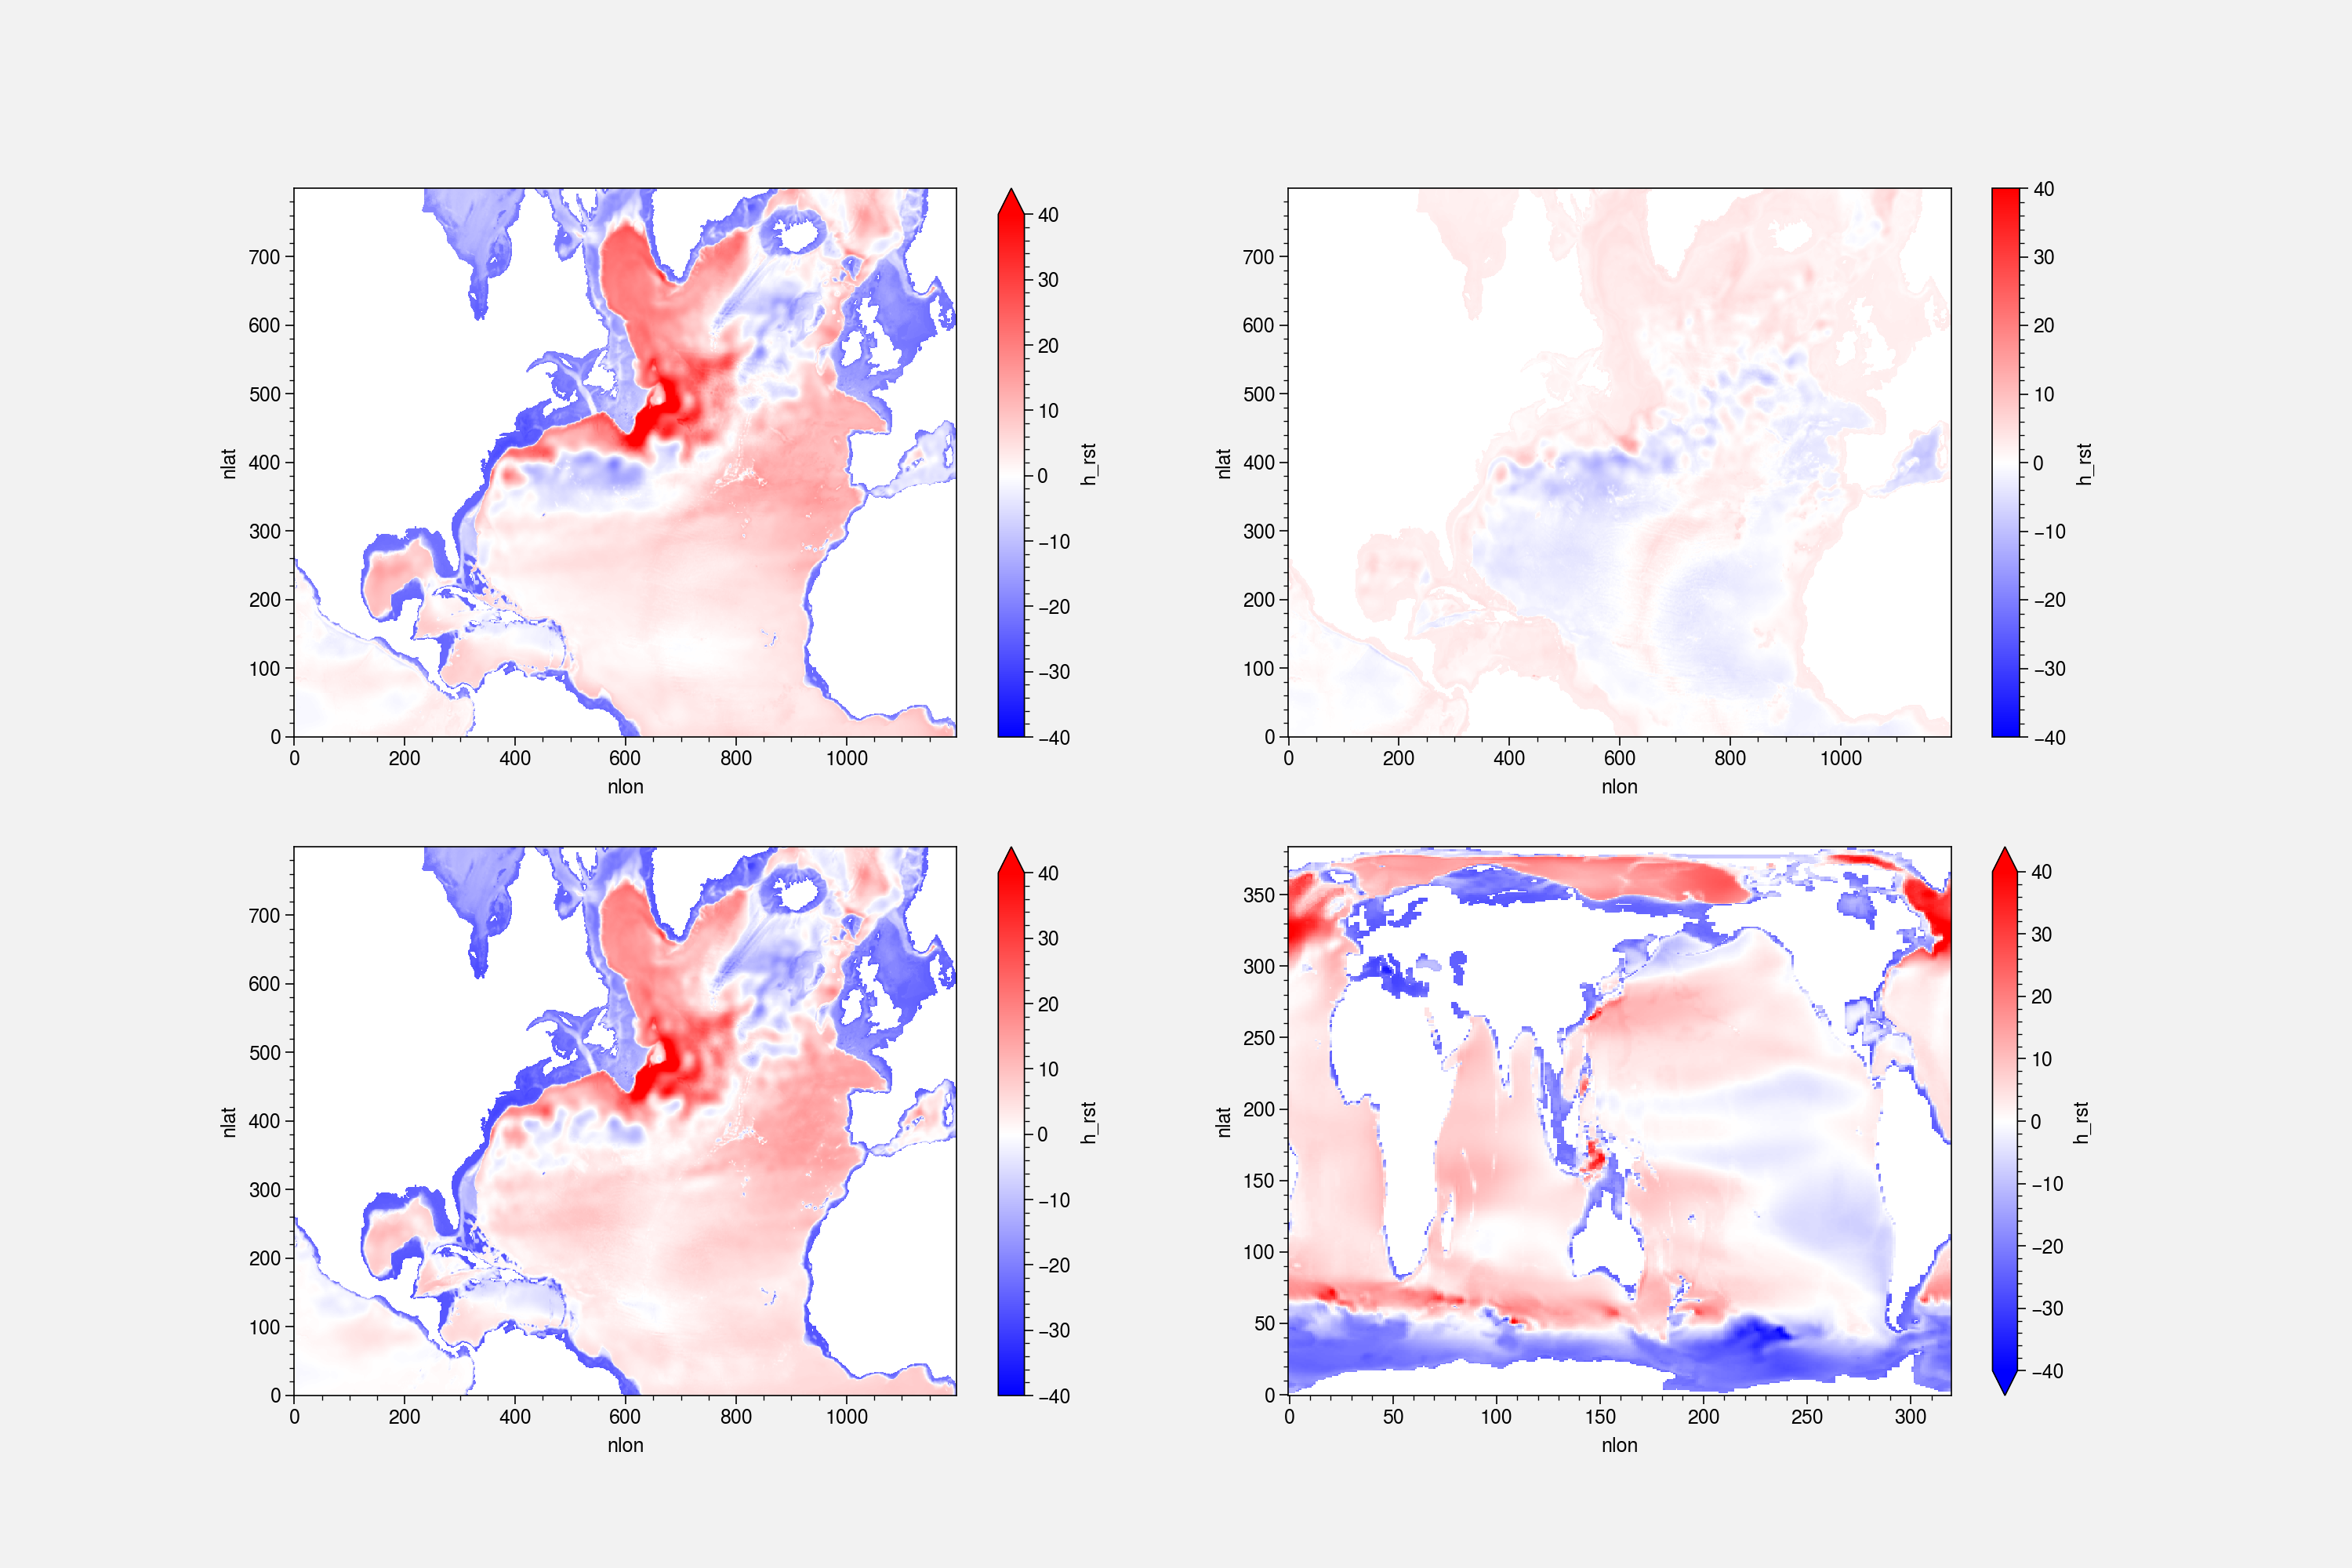

In [20]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
(dh_rst_TH.isel(nlon=slice(0,1200),nlat=slice(1200,2000))).plot(ax=axs[0,0],vmin=-40,vmax=40,cmap='bwr')
(dh_rst_CH.isel(nlon=slice(0,1200),nlat=slice(1200,2000))).plot(ax=axs[0,1],vmin=-40,vmax=40,cmap='bwr')
(dh_rst_TH-dh_rst_CH).isel(nlon=slice(0,1200),nlat=slice(1200,2000)).plot(ax=axs[1,0],vmin=-40,vmax=40,cmap='bwr')
(dh_rst_TL).plot(ax=axs[1,1],vmin=-40,vmax=40,cmap='bwr')
# (dh_rst_CL).plot(ax=axs[0,1],vmin=-40,vmax=40,cmap='bwr')
# (dh_rst_TL-dh_rst_CL).plot(ax=axs[1,0],vmin=-40,vmax=40,cmap='bwr')

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)


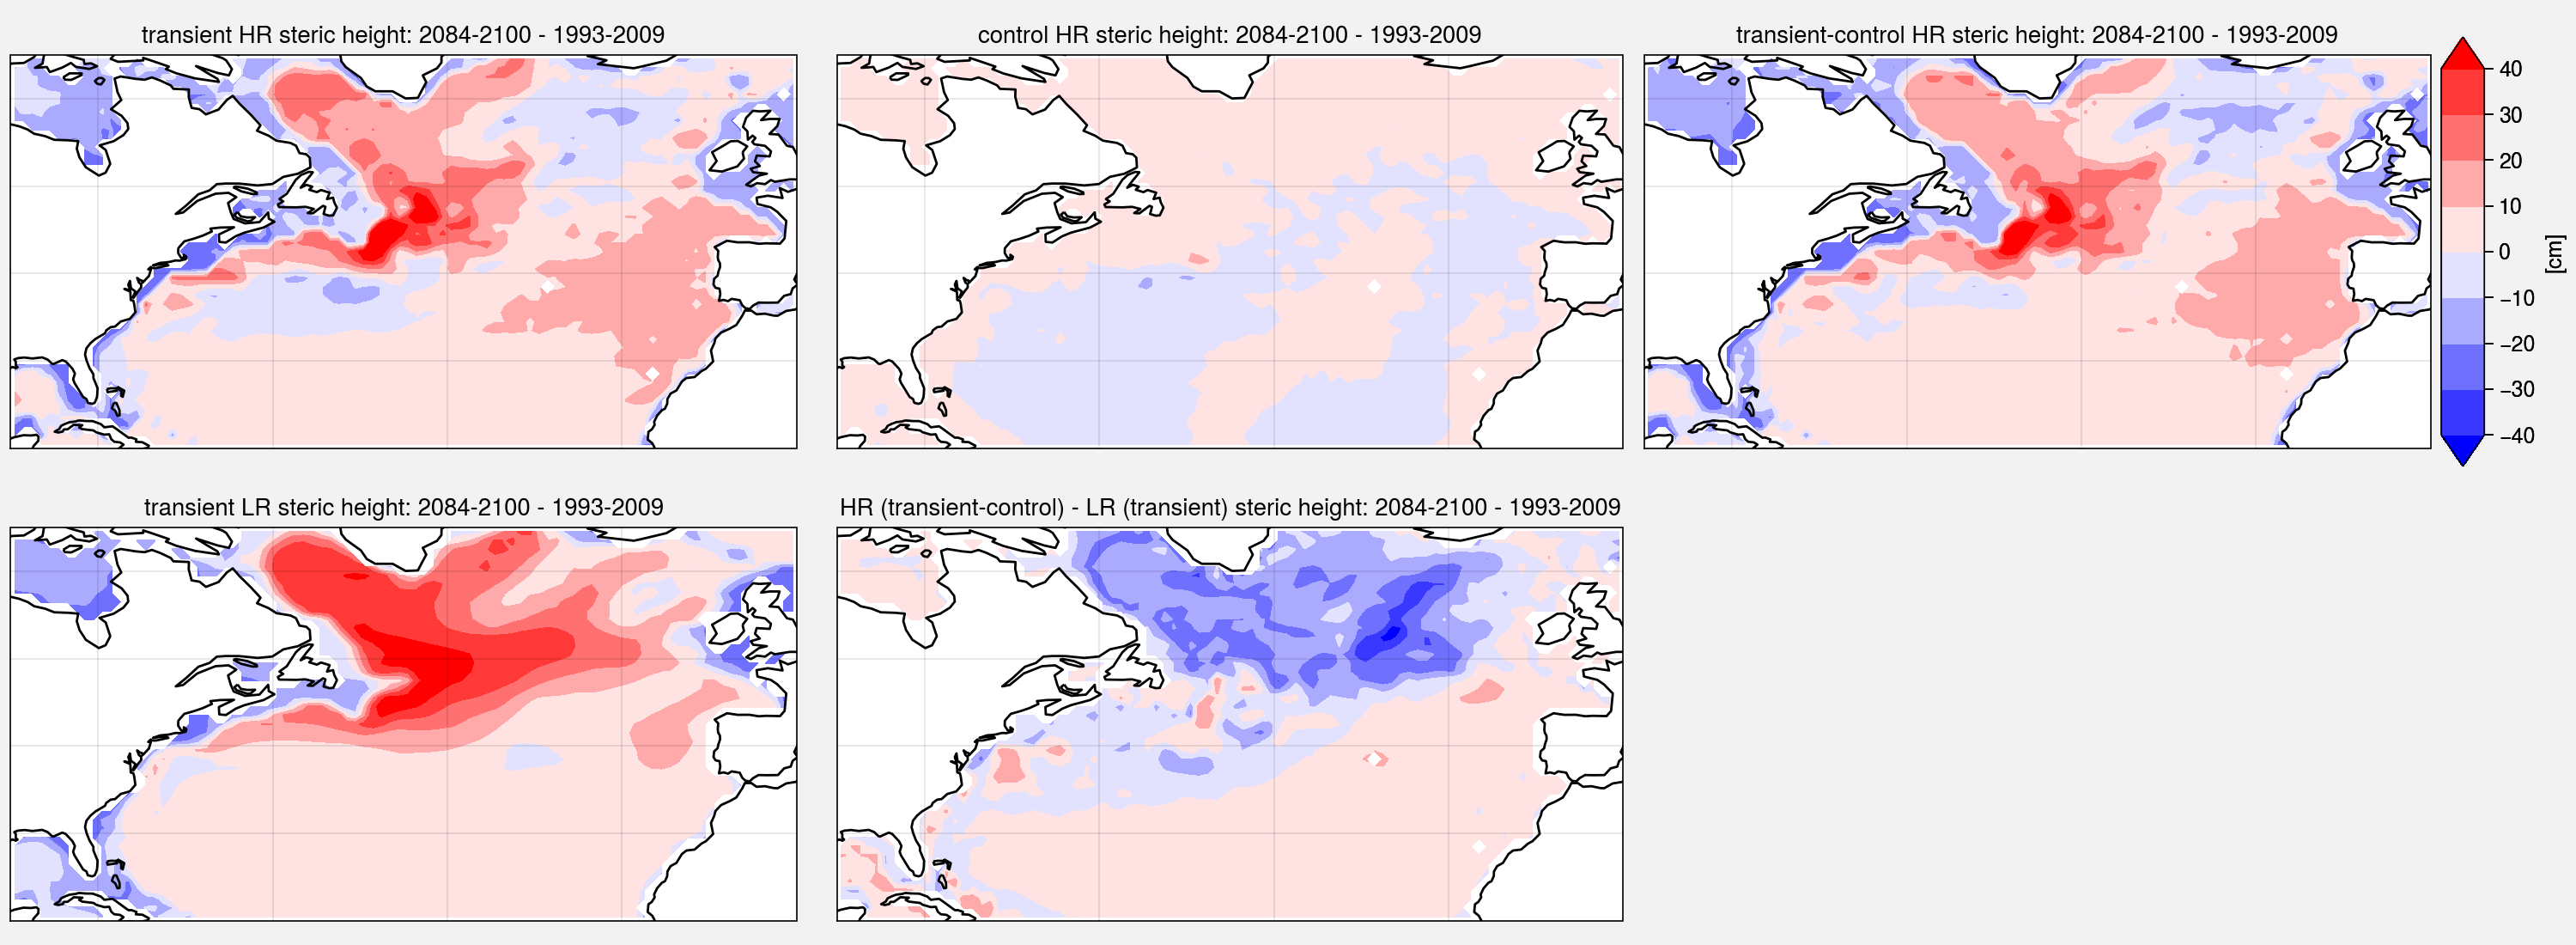

In [21]:
pc = cartopy.crs.PlateCarree()

fig, axs = plot.subplots(ncols=3, nrows=2, proj='cyl', width='15in', height='5.5in')

# row 1: climatology mean ssh
axs[0,0].contourf(dh_rst_rgd_NA_TH.lon, dh_rst_rgd_NA_TH.lat, 
        dh_rst_rgd_NA_TH, levels=np.arange(-40,40+1,10), transform=pc, 
        vmin=-40, vmax=40, cmap="bwr", extend='both')
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,0].set_title('transient HR steric height: 2084-2100 - 1993-2009')

axs[0,1].contourf(dh_rst_rgd_NA_CH.lon, dh_rst_rgd_NA_CH.lat, 
        dh_rst_rgd_NA_CH, levels=np.arange(-40,40+1,10), transform=pc, 
        vmin=-40, vmax=40, cmap="bwr", extend='both')
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,1].set_title('control HR steric height: 2084-2100 - 1993-2009')


m1=axs[0,2].contourf(dh_rst_rgd_NA_TH.lon, dh_rst_rgd_NA_TH.lat, 
        dh_rst_rgd_NA_TmCH, levels=np.arange(-40,40+1,10), transform=pc, 
        vmin=-40, vmax=40, cmap="bwr", extend='both')
axs[0,2].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,2].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,2].set_title('transient-control HR steric height: 2084-2100 - 1993-2009')

# Now adding the colorbar
cb = axs[0,2].colorbar(m1,loc='r',label='[cm]',extend='both',width='2em',shrink=1)

axs[1,0].contourf(dh_rst_rgd_NA_TL.lon, dh_rst_rgd_NA_TL.lat, 
        dh_rst_rgd_NA_TL, levels=np.arange(-40,40+1,10), transform=pc, 
        vmin=-40, vmax=40, cmap="bwr", extend='both')
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[1,0].set_title('transient LR steric height: 2084-2100 - 1993-2009')

m2=axs[1,1].contourf(dh_rst_rgd_NA_TL.lon, dh_rst_rgd_NA_TL.lat, 
        (dh_rst_rgd_NA_TmCH-dh_rst_rgd_NA_TL), levels=np.arange(-40,40+1,10), transform=pc, 
        vmin=-40, vmax=40, cmap="bwr", extend='both')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[1,1].set_title('HR (transient-control) - LR (transient) steric height: 2084-2100 - 1993-2009')

axs[1,2].format(gridlinewidth=0)
axs[1,2].set_visible(False)
# cb = axs[1,1].colorbar(m1,loc='r',label='[cm]',extend='both',width='2em',shrink=1)